In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
arch_excel = 'Calidad del Agua Subterranea 2021.xlsx'
df = pd.read_excel(arch_excel, sheet_name='CASUB_2021')

In [34]:
cuantos = df['ESTADO'].value_counts()
cuantos

DURANGO                            140
SONORA                              79
ZACATECAS                           68
COAHUILA DE ZARAGOZA                54
SINALOA                             35
MEXICO                              30
BAJA CALIFORNIA SUR                 29
SAN LUIS POTOSI                     27
MICHOACAN DE OCAMPO                 20
JALISCO                             19
CHIAPAS                             16
GUANAJUATO                          15
HIDALGO                             12
AGUASCALIENTES                      12
YUCATAN                             11
VERACRUZ DE IGNACIO DE LA LLAVE     10
BAJA CALIFORNIA                      9
CAMPECHE                             9
OAXACA                               8
PUEBLA                               8
TAMAULIPAS                           8
COLIMA                               7
NUEVO LEON                           6
NAYARIT                              6
CHIHUAHUA                            6
TABASCO                  

In [35]:
semaforo = df['ORGANISMO_DE_CUENCA']

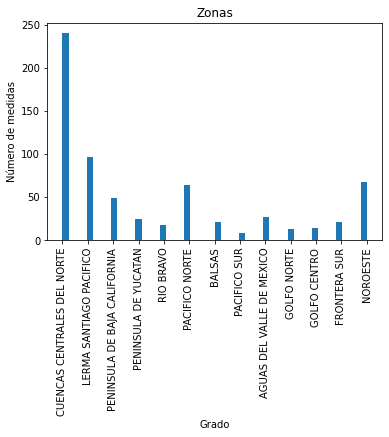

In [36]:
plt.hist(semaforo, bins=50)  # Puedes ajustar el número de bins según tus necesidades

# Agregar etiquetas y título al histograma
plt.xlabel('Grado')
plt.xticks(rotation=90)
plt.ylabel('Número de medidas')
plt.title('Zonas')

# Mostrar el histograma
plt.show()

In [37]:
conteo_estados = df[df['SEMAFORO'] == 'Rojo'].groupby('ESTADO').size()
conteo_estados

ESTADO
AGUASCALIENTES                      6
BAJA CALIFORNIA                     3
BAJA CALIFORNIA SUR                13
CAMPECHE                            4
CHIAPAS                             7
CHIHUAHUA                           3
COAHUILA DE ZARAGOZA               35
DURANGO                            86
GUERRERO                            2
HIDALGO                             8
JALISCO                             6
MEXICO                              6
MICHOACAN DE OCAMPO                 3
MORELOS                             2
NAYARIT                             4
NUEVO LEON                          2
OAXACA                              3
PUEBLA                              4
SAN LUIS POTOSI                    14
SINALOA                            11
SONORA                             16
TABASCO                             3
TAMAULIPAS                          2
TLAXCALA                            2
VERACRUZ DE IGNACIO DE LA LLAVE     2
YUCATAN                             8
ZACAT

# Todo el pais

In [38]:
conteo_evaluaciones = df['SEMAFORO'].value_counts()
conteo_evaluaciones

Rojo        292
Verde       282
Amarillo     91
Name: SEMAFORO, dtype: int64

In [39]:
conteo_estados = df[df['SEMAFORO'] == 'Rojo']['ESTADO'].value_counts().fillna(0)
conteo_estados

DURANGO                            86
ZACATECAS                          37
COAHUILA DE ZARAGOZA               35
SONORA                             16
SAN LUIS POTOSI                    14
BAJA CALIFORNIA SUR                13
SINALOA                            11
HIDALGO                             8
YUCATAN                             8
CHIAPAS                             7
MEXICO                              6
AGUASCALIENTES                      6
JALISCO                             6
NAYARIT                             4
PUEBLA                              4
CAMPECHE                            4
BAJA CALIFORNIA                     3
TABASCO                             3
OAXACA                              3
MICHOACAN DE OCAMPO                 3
CHIHUAHUA                           3
VERACRUZ DE IGNACIO DE LA LLAVE     2
TAMAULIPAS                          2
MORELOS                             2
GUERRERO                            2
NUEVO LEON                          2
TLAXCALA    

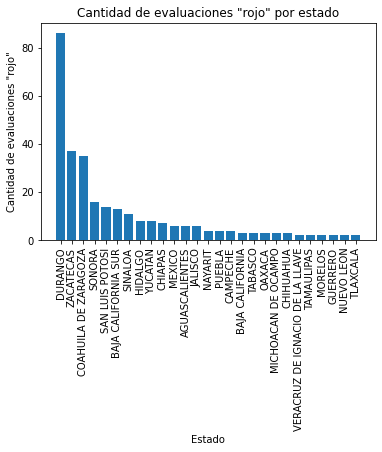

In [40]:
# Crear el gráfico de barras
plt.bar(conteo_estados.index, conteo_estados.values)

# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de evaluaciones "rojo" por estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de evaluaciones "rojo"')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

# En Quintana Roo

In [41]:
df_quintanaroo = df[df['ESTADO'].str.contains('QUINTANA ROO', case=False)]

In [42]:
verde_qroo = df_quintanaroo[df_quintanaroo['SEMAFORO'] == 'Verde']['MUNICIPIO'].value_counts()
verde_qroo

BENITO JUAREZ    1
Name: MUNICIPIO, dtype: int64

# Peninsula de Yucatan

In [43]:
df_peninsula = df[df['ORGANISMO_DE_CUENCA'].str.contains('PENINSULA DE YUCATAN', case=False)]

In [49]:
verde_penins = df_peninsula[df_peninsula['SEMAFORO'] == 'Verde']['ESTADO'].value_counts()
verde_penins

CAMPECHE        2
YUCATAN         2
QUINTANA ROO    1
Name: ESTADO, dtype: int64

In [55]:
conteo_municipios = df_peninsula.groupby(['MUNICIPIO', 'SEMAFORO']).size()
conteo_municipios = conteo_municipios.unstack().fillna(0)
conteo_municipios

SEMAFORO,Amarillo,Rojo,Verde
MUNICIPIO,,,
BENITO JUAREZ,1.0,0.0,1.0
CALKINI,1.0,1.0,0.0
CANDELARIA,1.0,0.0,0.0
CARMEN,0.0,0.0,1.0
CELESTUN,0.0,1.0,0.0
CHAMPOTON,1.0,0.0,0.0
ESCARCEGA,0.0,1.0,1.0
FELIPE CARRILLO PUERTO,1.0,0.0,0.0
HALACHO,0.0,1.0,0.0


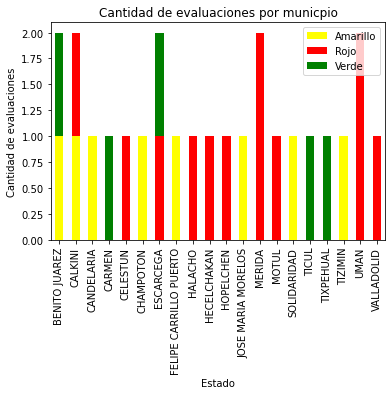

In [59]:
conteo_municipios.plot(kind='bar', stacked=True, color=['yellow','red', 'green'])
# Configurar el título y las etiquetas de los ejes
plt.title('Cantidad de evaluaciones por municpio')
plt.xlabel('Estado')
plt.ylabel('Cantidad de evaluaciones')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [47]:
df_carrillo= df[df['MUNICIPIO'].str.contains('FELIPE CARRILLO PUERTO', case=False)]
df_carrillo

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
218,DLQUI2215,POZO 3 DEL SISTEMA DE AGUA POTABLE DE FELIPE C...,PENINSULA DE YUCATAN,QUINTANA ROO,FELIPE CARRILLO PUERTO,PENINSULA DE YUCATAN,POZO,-88.041736,19.551606,2021,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [48]:
df_carrillo['SEMAFORO']

218    Amarillo
Name: SEMAFORO, dtype: object

# Graficas de todo el pais, dividido por zona 

In [63]:
cuencas = df['ORGANISMO_DE_CUENCA'].unique()
cuencas

array(['CUENCAS CENTRALES DEL NORTE', 'LERMA SANTIAGO PACIFICO',
       'PENINSULA DE BAJA CALIFORNIA', 'PENINSULA DE YUCATAN',
       'RIO BRAVO', 'PACIFICO NORTE', 'BALSAS', 'PACIFICO SUR',
       'AGUAS DEL VALLE DE MEXICO', 'GOLFO NORTE', 'GOLFO CENTRO',
       'FRONTERA SUR', 'NOROESTE'], dtype=object)

In [64]:
dataframes_por_cuenca = {}


dividiendo el df por cada cuenca

In [65]:
# Iterar sobre los estados y crear los nuevos DataFrames
for cuenca in cuencas:
    # Filtrar el DataFrame original por el estado actual
    df_cuenca = df[df['ORGANISMO_DE_CUENCA'] == cuenca].copy()
    
    # Guardar el DataFrame en el diccionario usando el estado como clave
    dataframes_por_cuenca[cuenca] = df_cuenca

In [69]:
conteo_municipios = df_peninsula.groupby(['MUNICIPIO', 'SEMAFORO']).size()
conteo_municipios = conteo_municipios.unstack().fillna(0)

In [70]:
# Crear un nuevo diccionario para almacenar los resultados
conteos_por_cuenca = {}

# Iterar sobre los DataFrames del diccionario
for cuenca, df_cuenca in dataframes_por_cuenca.items():
    # Agrupar por municipio y contar las ocurrencias de cada etiqueta
    conteo_municipios = df_cuenca.groupby('MUNICIPIO')['SEMAFORO'].value_counts().unstack().fillna(0)
    
    # Guardar el resultado en el nuevo diccionario usando el cuenca como clave
    conteos_por_cuenca[cuenca] = conteo_municipios

In [72]:
conteos_por_cuenca['PENINSULA DE BAJA CALIFORNIA']

SEMAFORO,Amarillo,Rojo,Verde
MUNICIPIO,,,
COMONDU,0.0,0.0,1.0
ENSENADA,3.0,3.0,1.0
LA PAZ,4.0,12.0,9.0
LOS CABOS,0.0,1.0,0.0
MULEGE,1.0,0.0,1.0
SAN LUIS RIO COLORADO,8.0,2.0,1.0
TECATE,1.0,0.0,1.0


<Figure size 72000x36000 with 0 Axes>

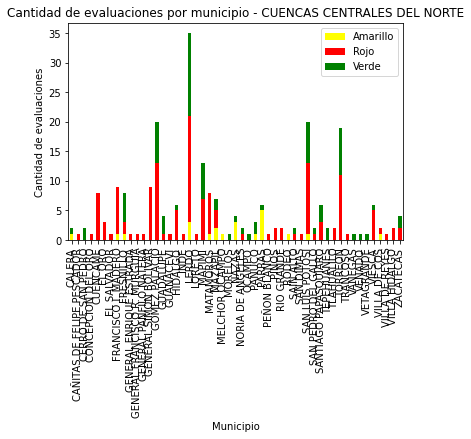

<Figure size 72000x36000 with 0 Axes>

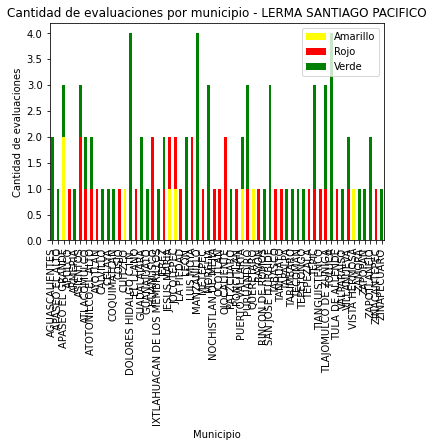

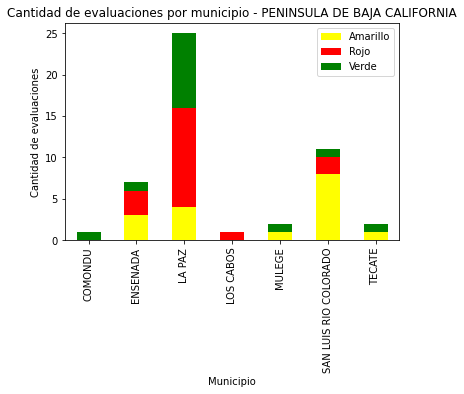

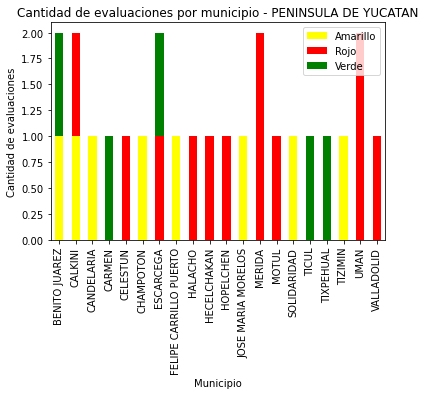

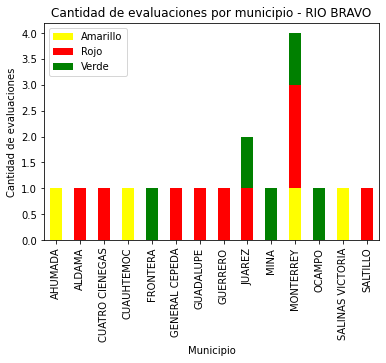

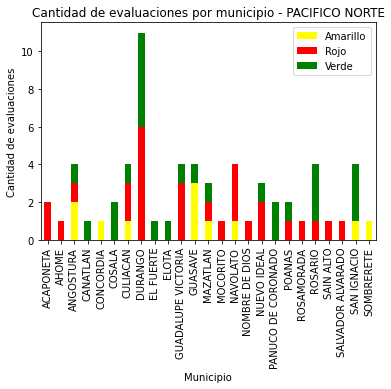

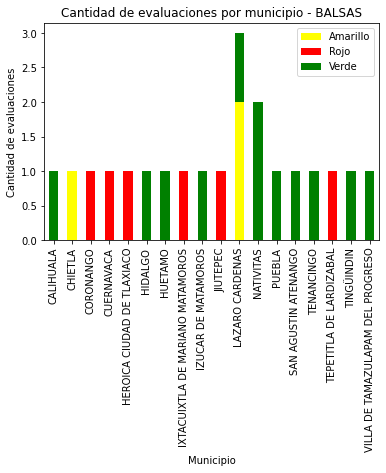

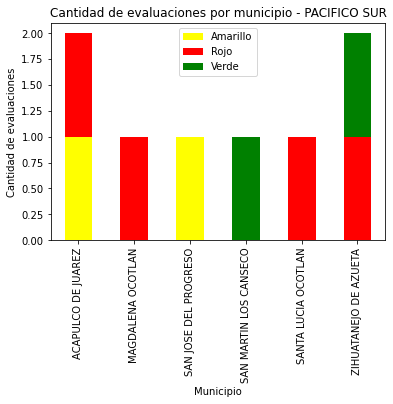

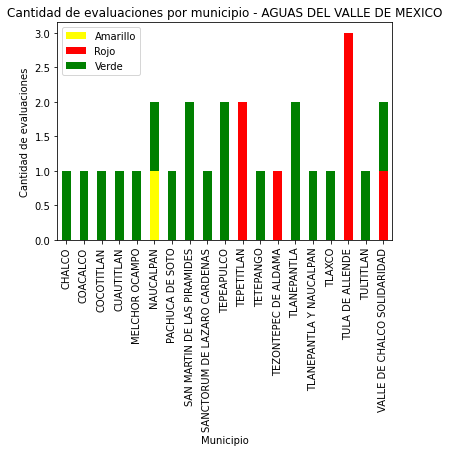

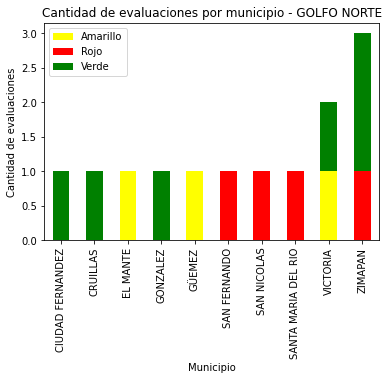

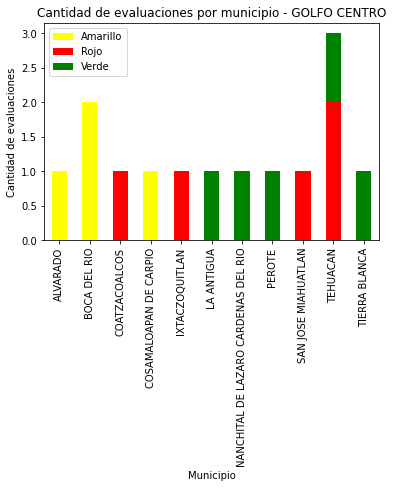

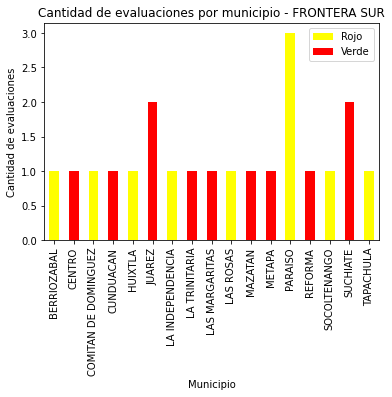

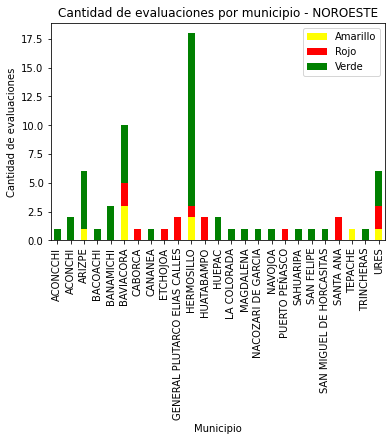

In [80]:
# Iterar sobre los conteos por cuenca y generar las gráficas
for cuenca, conteo_municipios in conteos_por_cuenca.items():
    # Crear el gráfico de barras
    if cuenca in ['CUENCAS CENTRALES DEL NORTE', 'LERMA SANTIAGO PACIFICO']:
        plt.figure(figsize=(1000, 500))
    conteo_municipios.plot(kind='bar', stacked=True, color=['yellow','red', 'green'])

    # Configurar el título y las etiquetas de los ejes
    plt.title(f'Cantidad de evaluaciones por municipio - {cuenca}')
    plt.xlabel('Municipio')
    plt.ylabel('Cantidad de evaluaciones')
    
    # Mostrar la leyenda
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()